In [1]:
#Import the train data
import pandas as pd
df=pd.read_csv('Week7_train.csv');
print(df.info)

<bound method DataFrame.info of        label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       

In [3]:
#check the shape of the data
df.shape

(42000, 785)

In [6]:
# select only 10% of the data from the experiment .will not use  total data as  KNN isdf=df.sample
mf=df.sample(frac=0.10)
mf.info

<bound method DataFrame.info of        label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
4754       8       0       0       0       0       0       0       0       0   
21282      0       0       0       0       0       0       0       0       0   
24090      3       0       0       0       0       0       0       0       0   
743        5       0       0       0       0       0       0       0       0   
23669      3       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
31938      9       0       0       0       0       0       0       0       0   
15559      9       0       0       0       0       0       0       0       0   
40587      2       0       0       0       0       0       0       0       0   
36115      9       0       0       0       0       0       0       0       0   
17458      9       0       0       0       0       0       0       0       0   

       

In [7]:
#5.print shape of selected dataset
mf.shape

(4200, 785)

In [21]:
#6.look at the top 5 rows
print(mf.iloc[:5])

       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
4754       8       0       0       0       0       0       0       0       0   
21282      0       0       0       0       0       0       0       0       0   
24090      3       0       0       0       0       0       0       0       0   
743        5       0       0       0       0       0       0       0       0   
23669      3       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
4754        0  ...         0         0         0         0         0   
21282       0  ...         0         0         0         0         0   
24090       0  ...         0         0         0         0         0   
743         0  ...         0         0         0         0         0   
23669       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
4754          0         0   

In [20]:
#7.find no of unique class  labels
unique_classes = mf['label'].unique()
print(f"Unique class labels: {unique_classes}")


Unique class labels: [8 0 3 5 6 1 9 4 7 2]


In [19]:
#8.find the no of examples for each class label
examples=mf['label'].value_counts()
print(examples)

label
1    459
7    455
3    444
9    435
6    432
4    421
0    409
8    408
2    369
5    368
Name: count, dtype: int64


In [30]:
#9.prepare x and y
x= mf.drop('label', axis=1)
y=mf[['label']]
print(x)
print(y)

       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
4754        0       0       0       0       0       0       0       0       0   
21282       0       0       0       0       0       0       0       0       0   
24090       0       0       0       0       0       0       0       0       0   
743         0       0       0       0       0       0       0       0       0   
23669       0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
31938       0       0       0       0       0       0       0       0       0   
15559       0       0       0       0       0       0       0       0       0   
40587       0       0       0       0       0       0       0       0       0   
36115       0       0       0       0       0       0       0       0       0   
17458       0       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel77

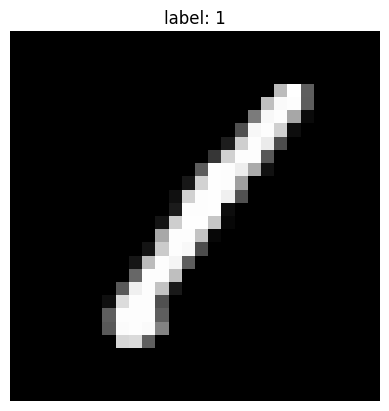

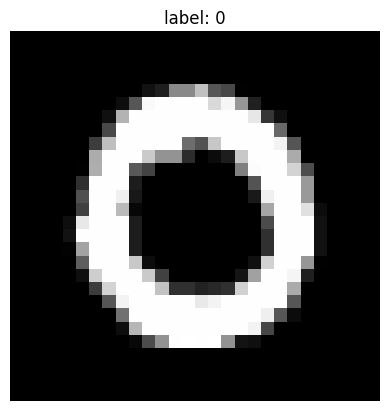

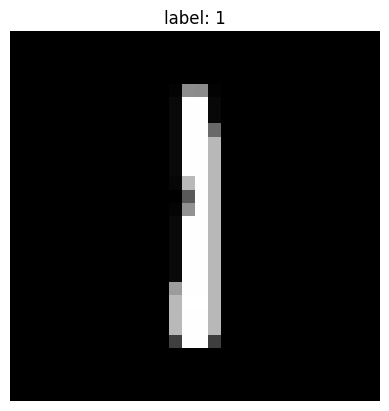

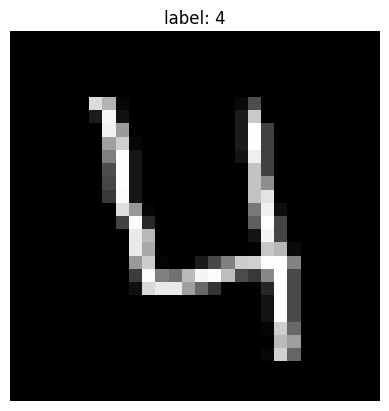

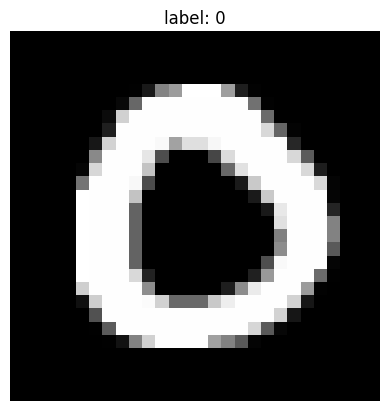

In [51]:
#10.Visualization the image of the first 5 digital in x also print the class label in
import matplotlib.pyplot as plt
for i in range(5):
 plt.imshow(df.iloc[i,1:].values.reshape(28,28),cmap='grey')
 plt.title(f"label: {df.iloc[i,0]}")
 plt.axis("off")
 plt.show()   


In [40]:
#11.split the train dataset into training set 75% and validation set 25%
import pandas as pd
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.25, random_state=42)
print(x_val)
print(x_train)

       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
22832       0       0       0       0       0       0       0       0       0   
36109       0       0       0       0       0       0       0       0       0   
41046       0       0       0       0       0       0       0       0       0   
40577       0       0       0       0       0       0       0       0       0   
17041       0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
23763       0       0       0       0       0       0       0       0       0   
15315       0       0       0       0       0       0       0       0       0   
40400       0       0       0       0       0       0       0       0       0   
30021       0       0       0       0       0       0       0       0       0   
25956       0       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel77

In [ ]:
#12.fit KNN classifier to training data
